In [65]:
import numpy as np
import pandas as pd
from numpy import hstack
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('data/daily_total.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE            datetime64[ns]
USERCOUNT                int64
SECONDSSPENT             int64
QUANTITY                 int64
VOLUME                 float64
WEIGHT                 float64
PRICE                  float64
dtype: object

In [67]:
df = df[df['DATE'] >= '2022-08-10']

In [68]:
# split into train and test sets
cols = ['QUANTITY', 'VOLUME', 'WEIGHT', 'PRICE', 'USERCOUNT']

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[:train_size], df[train_size:len(df)]
train_X, train_y = train[cols], train['SECONDSSPENT']
test_X, test_y = test[cols], test['SECONDSSPENT']

In [69]:
random_forest_model = RandomForestRegressor(random_state=1234)
print('Parameters currently in use:\n')
pprint(random_forest_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}


In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': ['mae']}
pprint(random_grid)


{'bootstrap': [True, False],
 'criterion': ['mae'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=1234)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=random_forest_model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=1234, n_jobs=-1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.5s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.5s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   6.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   6.6s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   6.1s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.5s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.4s
[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   2.8s
[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   2.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   4.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   3.6s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.2s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.1s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   2.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   2.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.7s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   3.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   4.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.6s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   4.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.0s
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   5.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.2s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.3s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   8.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.7s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.8s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   4.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   4.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=mae, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   4.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.9s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.2s
[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.6s
[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   3.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   3.2s
[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   3.1s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   4.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   6.5s
[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   7.2s
[CV] END bootstrap=False, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   6.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.2s
[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   2.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   3.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   3.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.1s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   3.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.8s
[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=True, criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   5.0s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=False, criterion=mae, max_depth=90, max_features=auto, min_sa

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mae'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1234, verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'mae',
 'bootstrap': True}

In [79]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_X, train_y)
base_accuracy = evaluate(base_model, test_X, test_y)

Model Performance
Average Error: 605139.4594
Accuracy = 2.13%.


In [80]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_X, test_y)

Model Performance
Average Error: 460154.9050
Accuracy = 44.04%.


In [81]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1965.92%.


In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['mae']
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [83]:
# Fit the grid search to the data
grid_search.fit(train_X, train_y)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_X, test_y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8,

/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_spli

/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=

/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.0s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.7s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-pack

[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s


/Users/hgu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, criterion=mae, max_depth=110, max_features=3, min_samples_leaf=5, min_

In [84]:
best_grid

RandomForestRegressor(criterion='mae', max_depth=100, max_features=3,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200)

In [57]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -2703.16%.


In [85]:
# random_forest_model = RandomForestRegressor(random_state=1234, 
#                                             bootstrap=True, 
#                                             max_depth=50, 
#                                             max_features='auto',
#                                             min_samples_leaf=4, 
#                                             min_samples_split=2, 
#                                             n_estimators=1600,
#                                             criterion='mae')

random_forest_model = RandomForestRegressor(random_state=1234, 
                                            max_depth=100, 
                                            max_features=3,
                                            min_samples_leaf=5, 
                                            min_samples_split=10, 
                                            n_estimators=200,
                                            criterion='mae')

In [86]:
model = BaggingRegressor(base_estimator=random_forest_model, random_state=1234)
model.fit(train_X, train_y)

BaggingRegressor(base_estimator=RandomForestRegressor(criterion='mae',
                                                      max_depth=100,
                                                      max_features=3,
                                                      min_samples_leaf=5,
                                                      min_samples_split=10,
                                                      n_estimators=200,
                                                      random_state=1234),
                 random_state=1234)

In [87]:
yhat = model.predict(test_X)

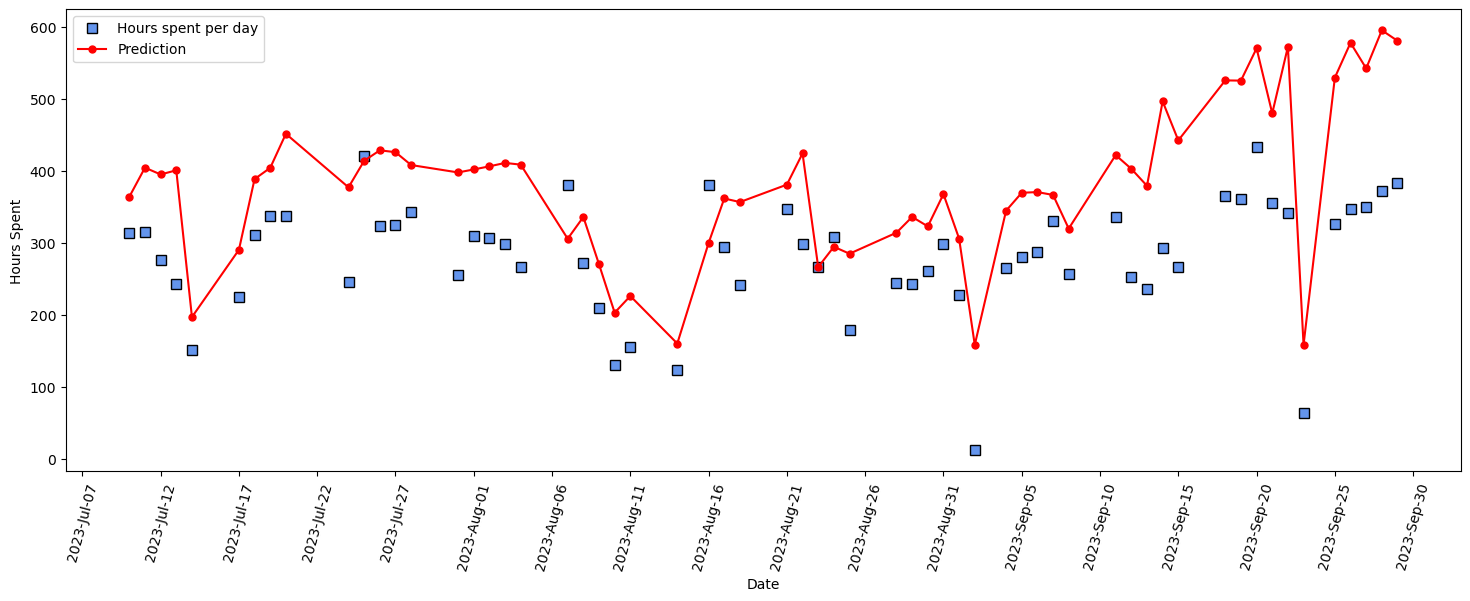

In [88]:
date = df['DATE'][train_size:]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(date, test_y / 3600, 
        linestyle='none', 
        marker='s',
        markerfacecolor='cornflowerblue', 
        markeredgecolor='black',
        markersize=7,
        label='Hours spent per day')
ax.plot(date, yhat / 3600, 
        linestyle='-',
        marker='o',
        markersize=5,
        color='red',
        label='Prediction')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
ax.set_xlabel('Date')
ax.set_ylabel('Hours Spent')
plt.xticks(rotation=75)
ax.legend(loc='upper left')
plt.show()

In [89]:
mae = mean_absolute_error(test_y, yhat) / 3600
print('MAE: %.3f' % mae)

MAE: 105.055
